In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading dataset
df=pd.read_csv("sales.csv")

In [3]:
#an overview of the dataset
df.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_code.1,product_type,markets_code,markets_name,zone,customer_code.1,custmer_name,customer_type,date,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR,Prod001,Own Brand\r,Mark001,Chennai,South,Cus001,Surge Stores,Brick & Mortar,2017-10-10,2017-10-01,2017,October,17-Oct\r
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR,Prod001,Own Brand\r,Mark002,Mumbai,Central,Cus002,Nomad Stores,Brick & Mortar,2018-05-08,2018-05-01,2018,May,18-May\r
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR,Prod002,Own Brand\r,Mark003,Ahmedabad,North,Cus003,Excel Stores,Brick & Mortar,2018-04-06,2018-04-01,2018,April,18-Apr\r
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR,Prod002,Own Brand\r,Mark003,Ahmedabad,North,Cus003,Excel Stores,Brick & Mortar,2018-04-11,2018-04-01,2018,April,18-Apr\r
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR,Prod002,Own Brand\r,Mark003,Ahmedabad,North,Cus004,Surface Stores,Brick & Mortar,2018-06-18,2018-06-01,2018,June,18-Jun\r


In [4]:
#info about dataset
print(f"Shape of data: {df.shape}")
print(f"Number of missing values in the data:\
{df.isnull().sum().sum()}")

Shape of data: (1000, 20)
Number of missing values in the data:0


In [5]:
df.dtypes


product_code       object
customer_code      object
market_code        object
order_date         object
sales_qty           int64
sales_amount        int64
currency           object
product_code.1     object
product_type       object
markets_code       object
markets_name       object
zone               object
customer_code.1    object
custmer_name       object
customer_type      object
date               object
cy_date            object
year                int64
month_name         object
date_yy_mmm        object
dtype: object

#Data cleaning

In [6]:
df.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'product_code.1',
       'product_type', 'markets_code', 'markets_name', 'zone',
       'customer_code.1', 'custmer_name', 'customer_type', 'date', 'cy_date',
       'year', 'month_name', 'date_yy_mmm'],
      dtype='object')

In [7]:
#will drop this column because its duplicated and doesn't look like a date actually
df['date_yy_mmm'].unique()

array(['17-Oct\r', '18-May\r', '18-Apr\r', '18-Jun\r', '17-Nov\r',
       '17-Dec\r', '18-Aug\r', '18-Jul\r', '19-Jun\r', '19-Jul\r',
       '19-Aug\r', '19-Sep\r', '18-Jan\r', '18-Feb\r', '18-Sep\r',
       '18-Nov\r', '18-Dec\r', '19-Jan\r', '19-Feb\r', '19-Mar\r',
       '19-Apr\r', '19-May\r', '19-Oct\r', '19-Nov\r', '19-Dec\r',
       '20-Jan\r', '20-Feb\r', '20-Mar\r', '20-Apr\r', '20-May\r',
       '18-Oct\r', '18-Mar\r', '20-Jun\r'], dtype=object)

In [8]:
df.drop(['product_code.1', 'customer_code.1','date','markets_code','date_yy_mmm','cy_date'],axis=1,inplace=True)

In [9]:
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_type,markets_name,zone,custmer_name,customer_type,year,month_name
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR,Own Brand\r,Chennai,South,Surge Stores,Brick & Mortar,2017,October
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR,Own Brand\r,Mumbai,Central,Nomad Stores,Brick & Mortar,2018,May
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR,Own Brand\r,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR,Own Brand\r,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR,Own Brand\r,Ahmedabad,North,Surface Stores,Brick & Mortar,2018,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Prod018,Cus016,Mark002,2019-02-15,62,129546,INR\r,Own Brand\r,Mumbai,Central,Logic Stores,Brick & Mortar,2019,February
996,Prod018,Cus022,Mark002,2019-02-15,4,9190,INR\r,Own Brand\r,Mumbai,Central,Electricalslytical,E-Commerce,2019,February
997,Prod018,Cus022,Mark002,2019-02-15,13,28269,INR\r,Own Brand\r,Mumbai,Central,Electricalslytical,E-Commerce,2019,February
998,Prod018,Cus022,Mark002,2019-02-18,3,6125,INR\r,Own Brand\r,Mumbai,Central,Electricalslytical,E-Commerce,2019,February


In [10]:
df['markets_name'].unique()

array(['Chennai', 'Mumbai', 'Ahmedabad', 'Delhi NCR', 'Kanpur',
       'Bengaluru', 'Bhopal', 'Lucknow'], dtype=object)

In [11]:
df['currency'].unique()

array(['INR', 'USD', 'INR\r', 'USD\r'], dtype=object)

In [12]:
#changing datatype
df[['sales_amount','sales_qty']].astype(int)
df['order_date']=pd.to_datetime(df['order_date'])
df[['year','month_name']].astype(str)
df[['currency','product_type','markets_name','zone','custmer_name','customer_type']].astype(str)

,currency,product_type,markets_name,zone,custmer_name,customer_type
0,INR,Own Brand\r,Chennai,South,Surge Stores,Brick & Mortar
1,INR,Own Brand\r,Mumbai,Central,Nomad Stores,Brick & Mortar
2,INR,Own Brand\r,Ahmedabad,North,Excel Stores,Brick & Mortar
3,INR,Own Brand\r,Ahmedabad,North,Excel Stores,Brick & Mortar
4,INR,Own Brand\r,Ahmedabad,North,Surface Stores,Brick & Mortar
...,...,...,...,...,...,...
995,INR\r,Own Brand\r,Mumbai,Central,Logic Stores,Brick & Mortar
996,INR\r,Own Brand\r,Mumbai,Central,Electricalslytical,E-Commerce
997,INR\r,Own Brand\r,Mumbai,Central,Electricalslytical,E-Commerce
998,INR\r,Own Brand\r,Mumbai,Central,Electricalslytical,E-Commerce


In [13]:
#removing "\"
df['currency']=df['currency'].replace('INR\r','INR')
df['currency']=df['currency'].replace('USD\r','USD')
df['product_type']=df['product_type'].replace('Own Brand\r','Own Brand')


In [14]:
#concatenate year and month column
df['month_year']=df['month_name'].map(str) +" "+ df['year'].map(str)

In [15]:
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_type,markets_name,zone,custmer_name,customer_type,year,month_name,month_year
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR,Own Brand,Chennai,South,Surge Stores,Brick & Mortar,2017,October,October 2017
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR,Own Brand,Mumbai,Central,Nomad Stores,Brick & Mortar,2018,May,May 2018
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR,Own Brand,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR,Own Brand,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR,Own Brand,Ahmedabad,North,Surface Stores,Brick & Mortar,2018,June,June 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Prod018,Cus016,Mark002,2019-02-15,62,129546,INR,Own Brand,Mumbai,Central,Logic Stores,Brick & Mortar,2019,February,February 2019
996,Prod018,Cus022,Mark002,2019-02-15,4,9190,INR,Own Brand,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
997,Prod018,Cus022,Mark002,2019-02-15,13,28269,INR,Own Brand,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
998,Prod018,Cus022,Mark002,2019-02-18,3,6125,INR,Own Brand,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019


In [16]:
#checked the recent changes
df['product_type'].unique()

array(['Own Brand'], dtype=object)

In [17]:
#since product_type we know its "our brand " we can drop it
df.drop('product_type',axis=1,inplace=True)

In [18]:
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,markets_name,zone,custmer_name,customer_type,year,month_name,month_year
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR,Chennai,South,Surge Stores,Brick & Mortar,2017,October,October 2017
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR,Mumbai,Central,Nomad Stores,Brick & Mortar,2018,May,May 2018
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR,Ahmedabad,North,Surface Stores,Brick & Mortar,2018,June,June 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Prod018,Cus016,Mark002,2019-02-15,62,129546,INR,Mumbai,Central,Logic Stores,Brick & Mortar,2019,February,February 2019
996,Prod018,Cus022,Mark002,2019-02-15,4,9190,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
997,Prod018,Cus022,Mark002,2019-02-15,13,28269,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
998,Prod018,Cus022,Mark002,2019-02-18,3,6125,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019


In [19]:
df.dtypes

product_code             object
customer_code            object
market_code              object
order_date       datetime64[ns]
sales_qty                 int64
sales_amount              int64
currency                 object
markets_name             object
zone                     object
custmer_name             object
customer_type            object
year                      int64
month_name               object
month_year               object
dtype: object

In [20]:
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,markets_name,zone,custmer_name,customer_type,year,month_name,month_year
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR,Chennai,South,Surge Stores,Brick & Mortar,2017,October,October 2017
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR,Mumbai,Central,Nomad Stores,Brick & Mortar,2018,May,May 2018
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR,Ahmedabad,North,Surface Stores,Brick & Mortar,2018,June,June 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Prod018,Cus016,Mark002,2019-02-15,62,129546,INR,Mumbai,Central,Logic Stores,Brick & Mortar,2019,February,February 2019
996,Prod018,Cus022,Mark002,2019-02-15,4,9190,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
997,Prod018,Cus022,Mark002,2019-02-15,13,28269,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
998,Prod018,Cus022,Mark002,2019-02-18,3,6125,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019


In [21]:
#we cannot have a sales of -1 and 0 ..we cant give items for free ..lol so we have to  filter them out
df['sales_amount'].unique()

array([ 41241,     -1,    875,    583,   7176,    500,    250,  21412,
        19213, 170185, 101194,   9426,    218,   3093,  30306,  52319,
       126296, 107500,    273,   3574,  23403,  76329,   4542,  16579,
       105301,    185,    556,    551,    167,    333,    833,   1000,
         1833,  10657,    157,    315,    630,    472,    787,   1102,
          944,   1417,   1259,   1574,  66111,   1884,   2574,   3773,
         2042,    417,    310,    208,    620,    829,   2694,    102,
          528,    380,    560,   1116,    657,   6218,   2426,  15278,
         3032,   3194,    912,   1824,    458,   4444,   2667,  19171,
         1370,   1333,    597,   8889,   1778,   9130,    602,   3227,
          449,   9880,    301,   7954,   2153,   5306,   1801,   2699,
         1616,   2245,      0,    903,   3778,    537,   4051,  14815,
         4495,   2690,  23866,    898,   4940,   3602,   3583,   4954,
         1889,   1352,    444,    505,   1514,   2023,  37889,    593,
      

In [22]:
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,markets_name,zone,custmer_name,customer_type,year,month_name,month_year
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR,Chennai,South,Surge Stores,Brick & Mortar,2017,October,October 2017
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR,Mumbai,Central,Nomad Stores,Brick & Mortar,2018,May,May 2018
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR,Ahmedabad,North,Surface Stores,Brick & Mortar,2018,June,June 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Prod018,Cus016,Mark002,2019-02-15,62,129546,INR,Mumbai,Central,Logic Stores,Brick & Mortar,2019,February,February 2019
996,Prod018,Cus022,Mark002,2019-02-15,4,9190,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
997,Prod018,Cus022,Mark002,2019-02-15,13,28269,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
998,Prod018,Cus022,Mark002,2019-02-18,3,6125,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019


In [23]:
#filtered
df[df['sales_amount'] > 0]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,markets_name,zone,custmer_name,customer_type,year,month_name,month_year
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR,Chennai,South,Surge Stores,Brick & Mortar,2017,October,October 2017
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR,Ahmedabad,North,Surface Stores,Brick & Mortar,2018,June,June 2018
5,Prod003,Cus005,Mark004,2017-11-20,59,500,USD,Delhi NCR,North,Premium Stores,Brick & Mortar,2017,November,November 2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Prod018,Cus016,Mark002,2019-02-15,62,129546,INR,Mumbai,Central,Logic Stores,Brick & Mortar,2019,February,February 2019
996,Prod018,Cus022,Mark002,2019-02-15,4,9190,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
997,Prod018,Cus022,Mark002,2019-02-15,13,28269,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019
998,Prod018,Cus022,Mark002,2019-02-18,3,6125,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019


In [24]:
df['currency'].unique()

array(['INR', 'USD'], dtype=object)

In [25]:
#making currency in local currency INR..exhange rate used here  to create a normalize valuea
inr = {'INR':1, 'USD':74.60}
df['nomalized_sales'] = df['currency'].map(inr) * df['sales_amount']
df

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,markets_name,zone,custmer_name,customer_type,year,month_name,month_year,nomalized_sales
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR,Chennai,South,Surge Stores,Brick & Mortar,2017,October,October 2017,41241.0
1,Prod001,Cus002,Mark002,2018-05-08,3,-1,INR,Mumbai,Central,Nomad Stores,Brick & Mortar,2018,May,May 2018,-1.0
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018,875.0
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR,Ahmedabad,North,Excel Stores,Brick & Mortar,2018,April,April 2018,583.0
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR,Ahmedabad,North,Surface Stores,Brick & Mortar,2018,June,June 2018,7176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Prod018,Cus016,Mark002,2019-02-15,62,129546,INR,Mumbai,Central,Logic Stores,Brick & Mortar,2019,February,February 2019,129546.0
996,Prod018,Cus022,Mark002,2019-02-15,4,9190,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019,9190.0
997,Prod018,Cus022,Mark002,2019-02-15,13,28269,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019,28269.0
998,Prod018,Cus022,Mark002,2019-02-18,3,6125,INR,Mumbai,Central,Electricalslytical,E-Commerce,2019,February,February 2019,6125.0


In [26]:
#checking to see whether fx change worked
df[df['currency']=="USD"]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,markets_name,zone,custmer_name,customer_type,year,month_name,month_year,nomalized_sales
5,Prod003,Cus005,Mark004,2017-11-20,59,500,USD,Delhi NCR,North,Premium Stores,Brick & Mortar,2017,November,November 2017,37300.0
6,Prod003,Cus005,Mark004,2017-11-22,36,250,USD,Delhi NCR,North,Premium Stores,Brick & Mortar,2017,November,November 2017,18650.0
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD,Delhi NCR,North,Premium Stores,Brick & Mortar,2017,November,November 2017,37300.0
287,Prod003,Cus005,Mark004,2017-11-22,36,250,USD,Delhi NCR,North,Premium Stores,Brick & Mortar,2017,November,November 2017,18650.0


In [27]:
#creating cleaned dataset
#df.to_csv('cleaned_sales.csv',index=False)

Visualizing dataset based On Questions

# Sales Breakdown By Cities(markets)

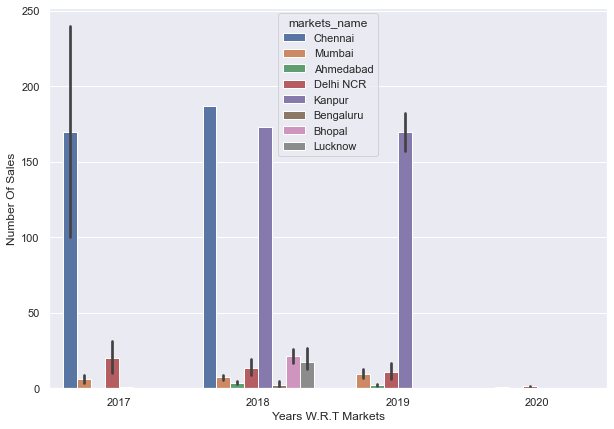

In [28]:
plt.figure(figsize=(10,7))
sns.set()
sns.barplot(x='year', y='sales_qty',data=df,hue='markets_name')
plt.xlabel('Years W.R.T Markets')
plt.ylabel('Number Of Sales')
plt.show()

# Sales Breakdown with month

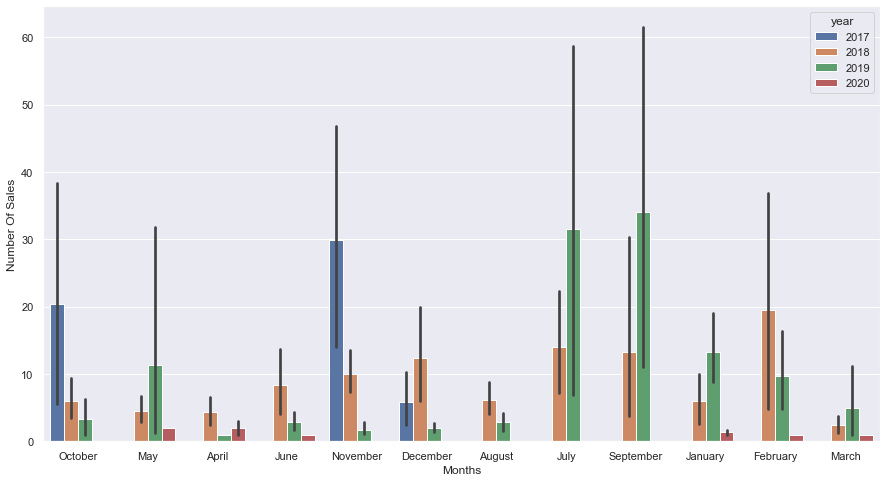

In [29]:
plt.figure(figsize=(15,8))

sns.barplot(x='month_name', y='sales_qty',data=df,hue='year')
plt.xlabel('Months')
plt.ylabel('Number Of Sales')
plt.show()

from the look of 2018 to 2020 there is decline in sales

# so now we can observe that sales are declining. And the question is ..why are sales declining ?

1. Is it because we have a competing company ?
2. Is our customer care not good enough ?
3. Has our product lost value ?
3. Are our products expensive as  compared to our competing companies ?
4. Should we start give discounts?

# Revenue Breakdown

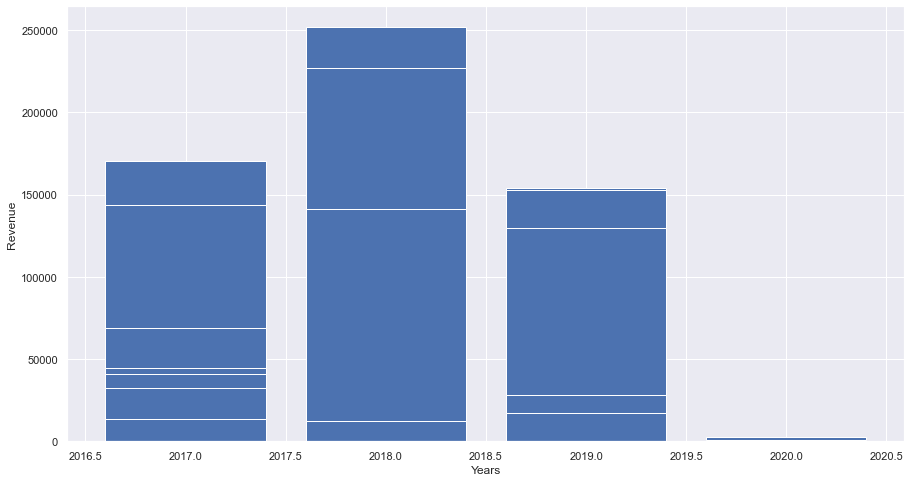

In [30]:
plt.figure(figsize=(15,8))

plt.bar(df['year'], df['nomalized_sales'])
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.show()

# Revenue also declined 

-Its obvious that when sales decline revenue will also decline but 

1. what measures did we implement for the high revenue in 2018?

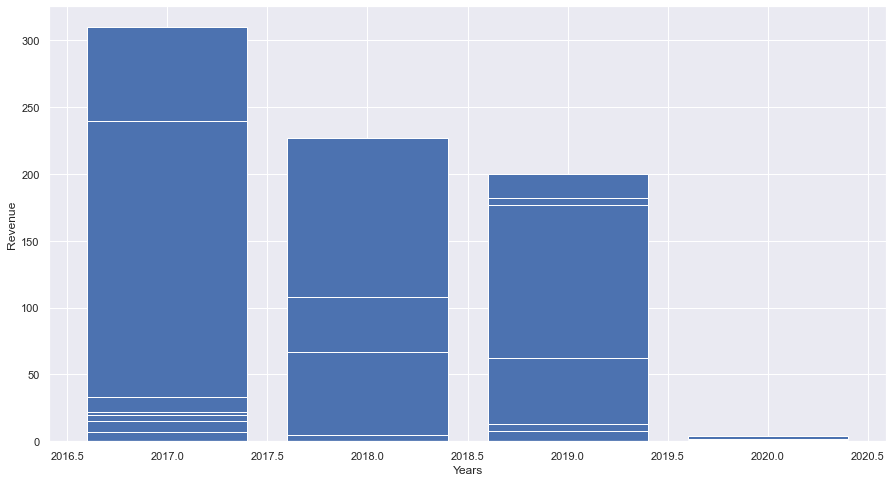

In [31]:
plt.figure(figsize=(15,8))

plt.bar(df['year'], df['sales_qty'])
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.show()

To Navigate Dashboard:
    click on this link:https://public.tableau.com/views/sprocket_sales_dashboard/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
